# Gas Drag on Moons in Synestias

Synestias can form moons. It is a natural consequence of the cooling process a synestia undergoes as its photosphere (where cloud cover is, where rock vapor condenses) radiates heat into the cold vacuum of space. There is a great deal of silicate vapor (also referred to as gas) in the moon-forming region of a synestia, which provides a significant source of material with which to grow a moon.

Before a moon can coalesce out of a synestia, the smaller building blocks of a moon, moonlets (also called condensates and liquid droplets), must condense out of the cooled vapor in a synestia. Similarly, before a puddle can be pool on Earth's surface, water vapor must condense in Earth's atmosphere and rain to the surface.

Once a parcel of gas from the synestia condenses into a liquid droplet, that parcel is no longer coupled to its fellow gas parcels. The surrounding gas cannot support the condensate. The moonlet loses pressure support from the surrounding gas and begins to fall towards the midplane (z = 0), pulled by gravitational forces. As the droplet falls, it passes through gas, which imparts a drag on the moonlet and causes the droplet to slow down and lose angular velocity. The orbit of the moonlets will decay over time in accord with the strength of the gas drag acceleration.

Will this droplet make it to the midplane and help form a moon? Will this droplet re-vaporize? Or will this droplet be lost to the planet-like central region of the synestia? To answer this, we need to know how strong the gas drag force is. What affects the strength of gas drag?

## Gas Drag Equation

In [ ]:
FIgure 15-11 Snorri Gudmundsson BScAE, MScAE, FAA DER(ret.), in General Aviation Aircraft Design, 2014

Let's get a sense for the magnitude of gas drag acceleration that we're dealing with. It is assumed that the moonlets experience a simple gas drag (known as laminar flow). The equation is as follows:
$$a_{drag}=\frac{C_D\ A \ \rho_{gas} \ (u_{gas} - u_{body})^2}{2 \ m_{body}}$$

Simple gas drag acceleration a$_{drag}$ is dependent on:
the gas with density $\rho_{gas}$ that drags a body of mass $m_{body}$, the cross sectional area A of the body that the gas is interacting with (typically we assume solar system bodies are spherical, so they would have a circular cross section), the gas drag coefficient C$_D$ (what thermal regime we are in), and the relative velocity between the gas and the body being dragged u$_{gas}$-u$_{body}$.

If the body were traveling at the same speed and in the same direction as the gas surrounding it, it wouldn't matter how fast the body was traveling, there would be no gas drag acting on the body. The differential between the speeds is what affects the gas drag's magnitude the most. Note that if the body is traveling at the same speed of the gas but in the <i>opposite direction</i>, gas drag <i>would</i> act on the body. Think of the difference in velocity between a synestia's gas field and a moonlet as the headwind a moonlet must battle as it orbits within a synestia. If the gas and moonlet are moving in the same direction, but the gas is moving faster, the gas will help pull the moonlet along, much like how wind might push you from behind and help you run or move faster. If the gas and moonlet are moving in opposite directions, then the gas will slow the moonlet, much like how you might struggle to step or bicycle against a strong gust of a wind.

The gas drag acceleration is output below in units of m/s$^2$, but for a more intuitive idea of how strong these accelerations are, see the different accelerations you may encounter on Earth displayed below the plot. They are output in terms of 'g' where 1 g = 9.8 m/s$^2$. In other words, 1 g is the gravitational acceleration here on (the surface of) Earth. These are next to various speeds in m/s for reference to the speed of each relative velocity.

In [337]:
import numpy as np
import math
from ipywidgets import *
import matplotlib.pyplot as plt

vel_rel = np.linspace(0.0, 1000., 100) #relative velocity between gas and body in m/s
dens = 3000. #lunar density in kg/m3; 3.0 g/cc

def dragfunc(rad_body, C_D, dens_gas):
    #mass of body in kg; assume spherical body (and spherical cross section)
    mass_body = dens*(4./3.)*math.pi*(rad_body**3)
    #acceleration imparted on body due to gas drag in m/s^2
    a_drag = 0.5*C_D*math.pi*(rad_body**2)*dens_gas*(vel_rel**2)/mass_body
    plt.plot(vel_rel, a_drag)
    plt.xlabel('velocity of the gas relative to the velocity of the moonlet (m/s)')
    plt.ylabel('gas drag acceleration (m/s$^2$)')
    plt.show()
    plt.close()
   
#RELATIVE SCALE IN GENERAL: how big the moonlets are (marble, golf ball, grain of sand,
#yoga ball, soccer field, etc.), how fast the relative and absolute velocity is   
style = {'description_width': 'initial'}
layout = {'width': '400px'}
%matplotlib inline
interact(dragfunc,
         rad_body=FloatLogSlider(value=1, base=10, min=-3, max=6, step=1,
                                 description='Size of moonlet (m)', style=style, layout=layout),
         C_D=FloatSlider(value=2, min=0, max=2.5, step=0.5, description='Gas drag coefficient C$_D$ (-)',
                         continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         dens_gas=FloatLogSlider(value=1, base=10, min=-3, max=3, step=1,
                                 description='Gas density (kg/m$^3$)', style=style, layout=layout)
        )

#acceleration in terms of what we experience on Earth
accel_label=['on board space shuttle ISS','elevator headed up','gravitational pull on surface of Earth',
             'roller coaster launch','space shuttle launch, gravitron amusement ride','top of roller coaster loop',
             'maximum heavy braking on Formula One Car','maximum acceleration permitted on piloted planes',
             'hard slap to the face, car crash','shock capacity of mechanical wrist watch',
             'Mantis Shrimp claw strike','proton in Large Hadron Collider']
accel_g=['1e-6 g','0.2 g','1 g','1.5 g','3 g','5 g','6.3 g','10 g','100 g','5000 g','10400 g','1.9e8 g']
left_box0=widgets.VBox([widgets.Label(str(i)) for i in accel_label])
right_box0=widgets.VBox([widgets.Label(str(i)) for i in accel_g])

#velocity in terms of what we experience on Earth
vel_label=['Walking','Biking','Usain Bolt sprinting','Train','Car moving 100 mph (160 km/h)',
           'Helicopter','Commerical airplane','Speed of sound in air (sound barrier)']
vel_ms=['1.5 m/s','4.5 m/s','12.5 m/s','27 m/s','45 m/s','70 m/s','220 m/s','343 m/s']
left_box1=widgets.VBox([widgets.Label(str(i)) for i in vel_label])
right_box1=widgets.VBox([widgets.Label(str(i)) for i in vel_ms])

widgets.HBox([left_box0,right_box0,left_box1,right_box1])

interactive(children=(FloatLogSlider(value=1.0, description='Size of moonlet (m)', layout=Layout(width='400px'…

As expected, for the same gas field, gas drag acceleration is greater when the mass of the moonlet is smaller and the gas drag coefficient and relative velocity are larger. Gas drag will be stronger in a denser gas field.

## Decaying Orbits: Moonlets Dragged by Gas in a Synestia

We would like to see how this gas drag affects how a single moonlet travels through the vapor in a synestia.

In order to form a moon, these moonlets must survive long enough to collide and grow into a large enough body that is not heavily affected by gas drag and will remain in orbit around the synestia without breaking up from tidal forces. Otherwise, the masses of the moonlets will be added to the center of a synestia (extends to about 10,000 km) and lost to the moon-forming region of a synestia.

When a moonlet is formed, it will condense as a droplet at the photosphere (where the vapor saturates and has a pressure that lies on the vapor dome; think of this as the "cloud line"). Pressure from the surrounding gas will no longer be able to buoy the now dense droplet at its current height, so it will fall towards the midplane, pulled by gravity. The moon will oscillate near the midplane until it equilibrates; this should happen relatively quickly. Bigger moons are formed in the midplane, because they grow from colliding with other moonlets that reach the midplane. You will see how the gas drag significantly decays and circularizes the orbit of the moonlet over time.

You will have four options in the interactives below. You will be able to initialize the moonlet at the photosphere or in the midplane. Where you initialize a moonlet indicates where that moonlet condensed from the vapor in a synestia. You can control the size of the moonlets, though it is more likely for smaller mass moonlets (roughly cm-sized) to form at the photosphere and for moonlets in the midplane to be more massive (due to the addition of moonlets raining from the photosphere). In potential Moon-forming synestias, the gas drag coefficient is 2 (changing the coefficient has a relatively minimal effect on the gas drag magnitude anyways), so this has been set for you. The velocity of the moonlet and the surrounding gas will be calculated according to what is expected in a typical Moon-forming synestia, so you won't have control over the velocity differential either. However, you will have control of the gas density gradient and will be able to change how quickly density decreases radially and off the midplane. An orbit without gas drag is on the plot for reference.

In [ ]:
#J2 gravity orbits
#put with gas drag, so can compare side-by-side
import rebound
from syndef import synfits #import synestia snapshot (impact database)

Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg

def pltKep(rad_moon,sma,i,ecc):
    #rad_moon is the bodily radius of the moon
    #i is the inclination of the moon's orbital plane
    #sma is the semi-major axis of the moon's orbit
    #ecc is the eccentricity of the moon's orbit
    m_moon = 4.*math.pi*dens*(rad_moon**3)/3.
    sim = rebound.Simulation() #start simulation
    sim.units = ('Hr', 'M', 'Kg') #use SI units
    sim.add(m=Mass_syn) #add central body
    sim.add(m=m_moon,a=sma,inc=i,e=ecc)
    fig,ax_main,ax_sub1,ax_sub2 = rebound.OrbitPlot(sim,slices=1,xlim=[-120000000,60000000],ylim=[-60000000,60000000],unitlabel='(m)')

J2Ma2 = synfits.SNAP_Canup.J2Ma2
def J2(reb_sim):
    ps = reb_sim.particles
    r_orb = (ps[1].x**2 + ps[1].y**2 + ps[1].z**2)**0.5
    costheta = ps[1].z/r_orb
    grav2 = 3.0*reb_sim.G*J2Ma2*(r_orb**(-5))
    ps[1].ax -= ps[1].x*grav2*( 2.5*costheta*costheta - 0.5 )
    ps[1].ay -= ps[1].y*grav2*( 2.5*costheta*costheta - 0.5 )
    ps[1].az -= ps[1].z*grav2*( 2.5*costheta*costheta - 1.5 )

from rebound.plotting import fading_line
def pltJ2(rad_moon,sma,i,ecc):
        #rad_moon is the bodily radius of the moon
    #i is the inclination of the moon's orbital plane
    #sma is the semi-major axis of the moon's orbit
    #ecc is the eccentricity of the moon's orbit
    m_moon = 4.*math.pi*dens*(rad_moon**3)/3.
    sim_kep = rebound.Simulation() #start simulation
    sim_kep.units = ('Hr', 'M', 'Kg') #use SI units
    sim_kep.add(m=Mass_syn) #add central body
    sim_kep.add(m=m_moon,a=sma,inc=i,e=ecc)
    ps_kep = sim_kep.particles
    kep_moon = ps_kep[1]
    kep_orbit = np.asarray(kep_moon.sample_orbit())
    sim_j2 = rebound.Simulation() #start simulation
    sim_j2.units = ('Hr', 'M', 'Kg') #use SI units
    sim_j2.add(m=Mass_syn) #add central body
    sim_j2.add(m=m_moon,a=sma,inc=i,e=ecc)
    sim_j2.additional_forces = J2
    ps_j2 = sim_j2.particles
    #j2_moon = ps_j2[1]
    #j2_orbit = np.asarray(j2_moon.sample_orbit())
    N = 100
    j2_x = np.zeros(N)
    j2_y = np.zeros(N)
    j2_z = np.zeros(N)
    times = np.linspace(0.,1.,N)
    for k,time in enumerate(times):
        sim_j2.integrate(time)
        j2_x[k] = ps_j2[1].x
        j2_y[k] = ps_j2[1].y
        j2_z[k] = ps_j2[1].z
    fig,ax_main,ax_sub1,ax_sub2 = rebound.OrbitPlot(sim_j2,slices=1,xlim=[-120000000,60000000],ylim=[-60000000,60000000],unitlabel='(m)',color=True)
    lc_main = fading_line(kep_orbit[:,0], kep_orbit[:,1], linewidth=1)
    lc_sub1 = fading_line(kep_orbit[:,0], kep_orbit[:,2], linewidth=1)
    lc_sub2 = fading_line(kep_orbit[:,2], kep_orbit[:,1], linewidth=1)
    ax_main.add_collection(lc_main)
    ax_sub1.add_collection(lc_sub1)
    ax_sub2.add_collection(lc_sub2)
    
style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(pltJ2,
         rad_moon=FloatSlider(value=1, min=1, max=100, step=10, description='Body radius of moonlet (m)',
                            continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         sma=FloatSlider(value=20e6, min=10e6, max=60e6, step=10e6, description='Semi-major axis (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         i=FloatSlider(value=0, max=2.*math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         ecc=FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Body radius of moonlet (m)'…

In [5]:
import math
import numpy as np
import rebound
import matplotlib.pyplot as plt

Mass_syn=1e24#np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
dens=3000. #density of moonlet kg/m3
G_hr=(6.674e-11)*(3600**2) #gravitational constant converted to m^3 kg^-1 hr^-2
#def pltdrag(r0,x0,y0,z0)
r0=1e3 #body radius of moonlet in m
#widgets.Dropdown(
#    options=[('Coarse sand (mm)', 1.e-3),
#             ('Diameter of a belly button (cm)', 1.e-2),
#             ('Coconut (dm)', 0.1),
#             ('Cow (m)', 1.),
#             ('230 story building (km)', 1.e3),
#             ('Width of the United States (Mm)', 1.e6),
#             ('The Moon (3.5 Mm)', 3.5e6)],
#    value=1.,
#    description='Size (diameter) of moonlet:',
#    style=style
#)
#set up initial conditions for moonlet
m0=4.*math.pi*dens*(r0**3)/3. #mass of moonlet in kg
x0=20e6 #initial x position of moonlet in m
y0=0 #initial y position of moonlet in m
z0=30e6 #initial z position of moonlet in m
s0=(x0**2 + y0**2)**0.5 #initial moonlet distance from rotational axis in m
v_gas=0.95*(G_hr*Mass_syn/s0)**0.5 #sub-Keplerian gas velocity m/hr #0.01*(10.**(0.15599001870969695*np.log10(s0) - 1.6401471197424731))*((G_hr*Mass_syn/s0)**0.5)
vx0=-v_gas*y0/s0 #x-component of sub-Keplerian gas velocity m/hr
vy0=v_gas*x0/s0 #y-component of sub-Keplerian gas velocity m/hr

#intialize orbit simulation
sim_drag = rebound.Simulation() #start simulation
sim_drag.units = ('Hr', 'M', 'Kg') #use SI units, seconds not available
sim_drag.add(m=Mass_syn) #add central body: Earth mass synestia
sim_drag.add(m=m0,r=r0) #add moonlet to simulation
ps_drag = sim_drag.particles #initialize particle class (holds xyz position information)
ps_drag[1].x=x0 #set initial x position of moonlet in m
ps_drag[1].y=y0 #set initial y position of moonlet in m
ps_drag[1].z=z0 #set initial z position of moonlet in m
ps_drag[1].vx=vx0 #set initial x velocity of moonlet in m/hr #intial velocities will be same as gas
ps_drag[1].vy=vy0 #set initial y velocity of moonlet in m/hr
ps_drag[1].vz=0 #set initial z velocity of moonlet in m/hr #assume gas is not moving in z
sim_drag.integrator = "ias15"#"whfast"#"leapfrog"#symplectic integrator #"ias15" #default integrator; adaptive time-stepping
sim_drag.min_dt=0.001 #make sure doesn't pick too small of a time step
sim_drag.dt=0.001 #start with this time step
const1=10.55#10 to 11
const2=0.86#0.85 to 0.9
const3=0.9e35 #1e33 to 1e37
const4=-4.7 #-4.5 to -5

#define gas drag acceleration
def drag(sim_drag):
    #drag coefficient is 2 in potential Moon-forming synestias
    ps_x = ps_drag[1].x
    ps_y = ps_drag[1].y
    ps_z = ps_drag[1].z
    ps_vx = ps_drag[1].vx
    ps_vy = ps_drag[1].vy
    ps_vz = ps_drag[1].vz
    s=np.sqrt(np.power(ps_x,2) + np.power(ps_y,2)) #cylindrical radius of moonlet in m
    z_s=const1*np.power(s,const2) #scale height fit in m
    rho_g=const3*np.power(s,const4)*np.exp(-np.power(ps_z/z_s,2)) #gas density fit in kg/m^3
    v_g=0.95*np.sqrt(G_hr*Mass_syn/s) #sub-Keplerian gas velocity in m/hr #(10.**(0.15599001870969695*np.log10(s) - 1.6401471197424731))*((reb_sim.G*Mass_syn/s)**0.5)
    theta=np.arctan(ps_y/ps_x)
    v_gx=-np.abs(v_g*np.sin(theta))*np.sign(ps_y) #x component of gas velocity in m/hr
    v_gy=np.abs(v_g*np.cos(theta))*np.sign(ps_x) #y component of gas velocity in m/hr
    #assumption: speed of gas in z, v_gz, will be zero for synestia in hydrostatic equilibrium
    v_rel_x=ps_vx - v_gx
    v_rel_y=ps_vy - v_gy
    v_rel=np.sqrt(v_rel_x**2 + v_rel_y**2 + ps_vz**2)
    factor = math.pi*(ps_drag[1].r**2)*rho_g*v_rel/ps_drag[1].m #common factor for gas drag in components
    ps_drag[1].ax += -factor*v_rel_x
    ps_drag[1].ay += -factor*v_rel_y
    ps_drag[1].az += -factor*ps_vz

#tell simulation to add gas drag and update velocities with each time step
sim_drag.additional_forces = drag
sim_drag.force_is_velocity_dependent = 1
sim_drag.move_to_com() #move to center of mass (central body is at origin)

Noutputs = 300 #increase this to get a smoother curve for orbit
times = np.linspace(0.,140., Noutputs) #times to output position information of particle

#intialize holder arrays for positional output from simulation
xholder = np.zeros(Noutputs)
yholder = np.zeros(Noutputs)
zholder = np.zeros(Noutputs)
sholder = np.zeros(Noutputs)
for k,time in enumerate(times):
    xtemp = ps_drag[1].x
    ytemp = ps_drag[1].y
    stemp = np.sqrt(xtemp**2 + ytemp**2)
    if stemp <= 10e6:
        #exit out of simulation when reach the inner region (10,000,000 m)
        #shorten arrays to exclude zeros at end
        xholder = xholder[:k]
        yholder = yholder[:k]
        zholder = zholder[:k]
        sholder = sholder[:k]
        times = times[:k]
        break
    else:
        sim_drag.integrate(time)
        xholder[k] = xtemp   # This stores the data which allows us to plot it later
        yholder[k] = ytemp
        zholder[k] = ps_drag[1].z
        sholder[k] = stemp

print('The length of time the moonlet spends in the moon-forming region is {0:.1f} hr.'.format(times[-1]))

#plot
fig = plt.figure(figsize=(14,5))
ax = plt.subplot(131)
plt.plot(xholder/1e3, yholder/1e3)
plt.plot(x0/1e3,y0/1e3,'x',markersize=10)
plt.plot(0,0,'k*')
plt.plot(xholder[-1]/1e3, yholder[-1]/1e3,'o')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.axis('equal')
ax2 = plt.subplot(132)
plt.plot(sholder/1e3, zholder/1e3)
plt.plot(s0/1e3,z0/1e3,'x',markersize=10)
plt.plot(0,0,'k*')
plt.plot(sholder[-1]/1e3, zholder[-1]/1e3,'o')
plt.xlabel('distance to rotational axis r$_{xy}$ (km)')
plt.ylabel('vertical distance off midplane z (km)')
plt.axis('equal')
plt.show()
plt.close()
#ax3 = plt.subplot(133)
#plt.plot(sholder/1e3, zholder/1e3)
#plt.plot(s0/1e3,z0/1e3,'x',markersize=10)
#plt.plot(0,0,'k*')
#plt.plot(sholder[-1]/1e3, zholder[-1]/1e3,'o')
#plt.xlabel('time (hr)')
#plt.ylabel('radius r (km)')
#plt.axis('equal')
#plt.show()
#plt.close()

/anaconda3/lib/python3.6/site-packages/rebound/simulation.py:675: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


The length of time the moonlet spends in the moon-forming region is 138.6 hr.


<Figure size 1400x500 with 2 Axes>

You may have noticed that a moonlet decays more quickly when:  
1) the gas field of a synestia is denser,  
2) a moonlet condenses in the midplane (z = 0) as opposed to in the photosphere (high z), and  
3) a moonlet condenses closer to the center of a synestia.

Why is this?

CHANGE EQUATION TO ACCOMODATE GAS DRAG (No longer pressure supported), eqn is for condensate
$$\omega^2r < GM/r^2(1 + \frac{J_2Ma_{eq}^2}{}) + a_{drag}$$
(omega will change until they're equal)???
As a moonlet travels in a synestia, gas drag and gravity continuously compete with one another. As a moonlet moves in the z direction, gravity wants to accelerate the moonlet towards the midplane; gas drag wants to slow the moonlet down to match the z velocity of the gas (zero). It is only when a moonlet equilibrates in the midplane that gas drag vanishes in z and gravity holds the moonlet in the midplane. In terms of the x and y (or otherwise, r$_{xy}$) directions, the moonlet will try to settle into a Keplerian orbit now that it has lost its pressure support and only has gravity to stabilize its orbit. However, because the moonlet will try to move at a slightly higher angular velocity than the sub-Keplerian gas around it, gas drag will always try to slow the moonlet down, so the moonlet must compensate and drift inwards toward the center of its synestia to try again and settle into a stable Keplerian orbit. This results in the spiral decay you see above.

When a moonlet condenses out of a synestia near the photosphere, it will lose pressure support, but it will initially have the same velocity as the gas around it. The gas is moving at just below Keplerian velocities in r$_{xy}$ = (x, y) with zero velocity in z. At the start, the moonlet experiences very little gas drag and is being pulled towards the midplane (z = 0) by gravity, no longer balanced by gas pressure in z.

As gravity accelerates the moonlet towards the midplane, this creates a large velocity differential between the gas (zero velocity in z) and the moonlet. As gas drag begins to act in z, the particle slows in its descent to the midplane. Gas drag perturbs the moonlet's orbit, resulting in an elliptical, or eccentric, orbit. The higher off the midplane and closer to the central body the droplet starts its decay, the more elliptical the orbit. This temporarily prevents inward spiraling of the particle since the elliptical orbit moves the moonlet away from the center of its synestia.

The particle oscillates a bit around the midplane as it settles into gravitational equilibrium. The particle overshoots the midplane a little initially because it cannot slow down immediately at the midplane, loses speed as it turns back around but gains a little speed as it gets accelerated back up towards the midplane, and so on, until there is no movement in z.

The particle's orbit circularizes once the particle reaches the midplane, dampened by gas drag in the midplane.

The moonlet will approach the central body closely on one side of the orbit (nearest approach). The location of the moon's nearest approach will travel closer to the central body with time. Eventually, the moonlet will travel close enough to the central body that it will become a part of the interior (planet-like center) of a synestia. In this particular case, that distance is 10e6 m. The simulation ends when the moonlet reaches this point. The time it takes the moonlet to reach this distance is called the decay time. The shorter the decay time, the faster the moonlet decays and the shorter survival time the moonlet has in an Earth-mass synestia.

The higher off the midplane and farther away from the rotational axis the droplet condensed and began its orbital decay, the slower the particle decays. For either very small droplets or very large moonlets, orbital decay of the moonlet also survives the longest in the interior of a synestia.

Based on the fastest accretion time for the Moon in cooling simulations of Earth-mass synestias, the minimum time in which a Moon-mass could grow is about 10 years (87,600 hrs). Compared to this, a single 1-km-sized moonlet could survive , which is the fastest decay time of all the moonlet sizes. Barrier. Gas drag little effect on large particles (mass is not as affected) and small particles (very little surface area). lunar seed scoop up, particle could merge with other particles, structure of gas changing with time

It is important to note that a single moonlet within a synestia is not alone. There are many droplets condensing out of the photosphere at once, which creates a nearly continuous torrential downpour of rock rain as the synestia cools. These moonlets will collide with one another and grow. How quickly the moonlets combine into larger masses relative to the decay of their orbits via gas drag is what will dictate whether a lunar mass could survive.

<b>INSERT MASS GROWTH CURVE HERE?</b>

There is another factor as well. As a droplet descends into a synestia, the temperature and pressure of the gas surrounding the droplet will increase, with maximum temperature and pressure values at the midplane. A droplet must also combat vaporization in order to provide liquid material for the moon to grow from. This is a bit more complicated considering there are interactions with other droplets occurring, which may involve thermal buffering (some droplets at lower z act as shields and provide temperature buffers for the droplets behind them at greater z). I will not explore the effects of vaporization here but keep it in mind as you evaluate the decay times.
Convection

Lunar seed, chemistry, torques, shocks

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10


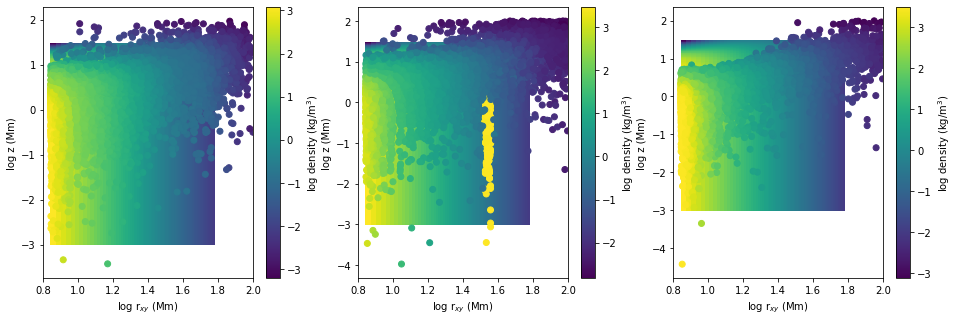

In [328]:
"""
from syndef import synfits #import synestia snapshot (impact database)

rxy=np.log10(np.linspace(7e6,60e6,100)/1e6) #Mm log10
z=np.log10(test_z/1e6) #Mm log10
test_rxy=np.linspace(7e6,60e6,100) #m
test_z=np.linspace(0.001e6,30e6,50) #m
TESTRXY,TESTZ=np.meshgrid(test_rxy,test_z) #2-D grid of rxy, z for color plot
#y=np.zeros(np.shape(rxy)) #array of zeros for residual fit

#rho1=synfits.resfuncspl(synfits.SNAP_Canup.rhomidfit[1],rxy,y)
#rho2=synfits.resfuncspl(synfits.SNAP_CukStewart.rhomidfit[1],rxy,y)
#rho3=synfits.resfuncspl(synfits.SNAP_Quintana.rhomidfit[1],rxy,y)

snaprho1=np.log10(synfits.SNAP_Canup.rho[synfits.SNAP_Canup.ind_outer])
snaprho2=np.log10(synfits.SNAP_CukStewart.rho[synfits.SNAP_CukStewart.ind_outer])
snaprho3=np.log10(synfits.SNAP_Quintana.rho[synfits.SNAP_Quintana.ind_outer])

snaprhomid1=np.log10(synfits.SNAP_Canup.rho[synfits.SNAP_Canup.ind_outer_mid])
snaprhomid2=np.log10(synfits.SNAP_CukStewart.rho[synfits.SNAP_CukStewart.ind_outer_mid])
snaprhomid3=np.log10(synfits.SNAP_Quintana.rho[synfits.SNAP_Quintana.ind_outer_mid])

snaprxy1=np.log10(synfits.SNAP_Canup.rxy[synfits.SNAP_Canup.ind_outer]/1e6)
snaprxy2=np.log10(synfits.SNAP_CukStewart.rxy[synfits.SNAP_CukStewart.ind_outer]/1e6)
snaprxy3=np.log10(synfits.SNAP_Quintana.rxy[synfits.SNAP_Quintana.ind_outer]/1e6)

snaprxymid1=np.log10(synfits.SNAP_Canup.rxy[synfits.SNAP_Canup.ind_outer_mid]/1e6)
snaprxymid2=np.log10(synfits.SNAP_CukStewart.rxy[synfits.SNAP_CukStewart.ind_outer_mid]/1e6)
snaprxymid3=np.log10(synfits.SNAP_Quintana.rxy[synfits.SNAP_Quintana.ind_outer_mid]/1e6)

snapz1=np.log10(synfits.SNAP_Canup.z[synfits.SNAP_Canup.ind_outer]/1e6)
snapz2=np.log10(synfits.SNAP_CukStewart.z[synfits.SNAP_CukStewart.ind_outer]/1e6)
snapz3=np.log10(synfits.SNAP_Quintana.z[synfits.SNAP_Quintana.ind_outer]/1e6)

const1=10.5#10 to 11; 10.55 (fiducial)
const2=0.86#0.85 to 0.9; 0.86 (fiducial)
const3=1e38 #0.9e35 (fiducial) / 1.5e33 (underestimate) / 1.1e37 (cross) / 1e38 (overestimate)
const4=-5.1 #-4.7 (fiducial) / -4.5 (underestimate) / -5 (cross) / -5.1 (overestimate)
test_z_s=const1*np.power(TESTRXY,const2) #scale height fit in m
test_rho_g=const3*np.power(TESTRXY,const4)*np.exp(-np.power(TESTZ/test_z_s,2))
test_rho_gmid=const3*np.power(test_rxy,const4)

plt.figure(figsize=(16,5))
plt.subplot(131)
#plt.plot(rxy,rho1,'b')
plt.plot(snaprxymid1,snaprhomid1,'r.')
plt.plot(np.log10(test_rxy/1e6),np.log10(test_rho_gmid),'k')
plt.xlabel('log r$_{xy}$ (Mm)')
plt.ylabel('log midplane density (kg/m$^3$)')
plt.title('Canup')
plt.xlim([.8,2])
plt.ylim([-2,3])

plt.subplot(132)
#plt.plot(rxy,rho2,'b')
plt.plot(snaprxymid2,snaprhomid2,'r.')
plt.plot(np.log10(test_rxy/1e6),np.log10(test_rho_gmid),'k')
plt.xlabel('log r$_{xy}$ (Mm)')
plt.ylabel('log midplane density (kg/m$^3$)')
plt.title('Cuk and Stewart')
plt.xlim([.8,2])
plt.ylim([-2,3])

plt.subplot(133)
#plt.plot(rxy,rho3,'b')
plt.plot(snaprxymid3,snaprhomid3,'r.')
plt.plot(np.log10(test_rxy/1e6),np.log10(test_rho_gmid),'k')
plt.xlabel('log r$_{xy}$ (Mm)')
plt.ylabel('log midplane density (kg/m$^3$)')
plt.title('Quintana')
plt.xlim([.8,2])
plt.ylim([-2,3])
plt.show()
plt.close()

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.pcolor(np.log10(TESTRXY/1e6),np.log10(TESTZ/1e6),np.log10(test_rho_g))
plt.scatter(snaprxy1,snapz1,c=snaprho1)
plt.xlabel('log r$_{xy}$ (Mm)')
plt.ylabel('log z (Mm)')
plt.colorbar(label='log density (kg/m$^3$)')
plt.xlim([.8,2])

plt.subplot(132)
plt.pcolor(np.log10(TESTRXY/1e6),np.log10(TESTZ/1e6),np.log10(test_rho_g))
plt.scatter(snaprxy2,snapz2,c=snaprho2)
plt.xlabel('log r$_{xy}$ (Mm)')
plt.ylabel('log z (Mm)')
plt.colorbar(label='log density (kg/m$^3$)')
plt.xlim([.8,2])

plt.subplot(133)
plt.pcolor(np.log10(TESTRXY/1e6),np.log10(TESTZ/1e6),np.log10(test_rho_g))
plt.scatter(snaprxy3,snapz3,c=snaprho3)
plt.xlabel('log r$_{xy}$ (Mm)')
plt.ylabel('log z (Mm)')
plt.colorbar(label='log density (kg/m$^3$)')
plt.xlim([.8,2])
plt.show()
plt.close()
"""

[3.62408351e+06 3.62435197e+03 2.72091359e+02 2.68467279e+05]


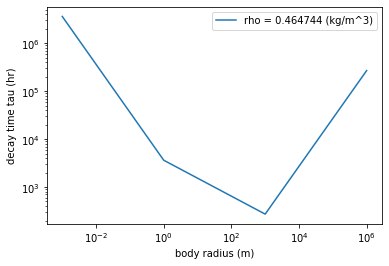

In [10]:
### calculate decay time scales for lunar particles
brad = np.asarray([1e-3,1.,1e3,1e6]) #m
masses = 4.*math.pi*dens*(brad**3)/3. #kg
xMoon = 20E6 #m
z_s=const1*(xMoon**const2) #scale height fit in m
rho_g=const3*(xMoon**const4)*np.exp(-(z0/z_s)**2)
vKep = np.sqrt(G_hr*Mass_syn/xMoon) #m/hr
v_g = 0.95*vKep #m/s gas velocity; 0.95 = v_gas/v_kep
eta = 0.5*(1. - (0.95**2)) #parameter relating gas and Keplerian velocity, pressure/temp related
w_K = vKep/xMoon #angular velocity in hr^-1
Tper = np.sqrt((xMoon**3)*4.*(math.pi**2)/(G_hr*Mass_syn)) #orbital period in hr
v_r = -v_g + vKep #m/hr; relative vel bet gas and particle; u = v_r since there are no y or z components to the gas or particle
drag = math.pi*brad*brad*rho_g*v_r/masses #m/hr^2
gvar = drag/w_K #g parameterization
t_spiral = Tper*(1. + gvar*gvar)/(4.*math.pi*eta*gvar) #hr
print(t_spiral)

plt.figure()
plt.loglog(brad,t_spiral,label='rho = %f (kg/m^3)' %rho_g)
plt.xlabel('body radius (m)')
plt.ylabel('decay time tau (hr)')
plt.legend()
plt.show()
plt.close()

Salmon and Canup (2012) don't resolve inner roche, spit out characteristic size, gravitational instability clumping in the disk 10 km Thompson and Stevenson, outer disk could clump, inner disk too hot, molten, sometimes self-gravitating clump that survives in the outer disk
synestia outer parts mized phase disk, liquid blebs and gas, inner is gas and rain from top, outer disk is like canonical disk -> clumps that would accrete quickly, spiral in and hit lunar seed then fine, but no lunar seed then sprialing in
spiraling in can hurt or help accretion depending on where the body is relative to the lunar seed
here is an example low density case, example high density case